# Part II - Ford GoBike Data Analysis
## by Sofiyah Eniola Elemide


## Investigation Overview


>This presentation displays how individual features in the dataset might be a factor that properly predicts the trip duration. 

> The insights that will be displayed throughout the documents are based on indivisual features and the relationship between other features in the dataset. 


## Dataset Overview

> The dataset contains 183412 records and originally 16 columns 7 of which are object or string variables, 2 integer variables and 7 float variables. But after data cleaning, the dataset now has 28 columns:

  > <ol>
    <li><strong>duration_sec</strong></li>
    <li><strong>start_time</strong></li>
    <li><strong>end_time</strong></li> 
    <li><strong>start_station_id</strong></li>
    <li><strong>start_station_name</strong></li>
    <li><strong>start_station_latitude</strong></li>
    <li><strong>start_station_longitude</strong>:</li>
    <li><strong>end_station_id</strong></li>
    <li><strong>end_station_name</strong></li>
    <li><strong>end_station_latitude</strong></li>
    <li><strong>end_station_longitude</strong></li>
    <li><strong>bike_id</strong></li>
    <li><strong>user_type</strong></li>
    <li><strong>member_birth_year</strong></li>
    <li><strong>member_gender</strong>: </li>
    <li><strong>start_day</strong></li>
    <li><strong>end_day</strong></li>
    <li><strong>start_hour</strong></li>
    <li><strong>end_hour</strong></li>
    <li><strong>start_time_of_day</strong></li>
    <li><strong>end_time_of_day</strong></li>
    <li><strong>start_month</strong></li>
    <li><strong>end_month</strong></li>
    <li><strong>bike_share_for_all_trip</strong></li>
    </ol>


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# I am using the cleaned dataset
df = pd.read_csv('bike_mega.csv')

# test
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_month,end_date,end_clock,end_day,end_month,start_hour,end_hour,start_time_of_day,end_time_of_day,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,February,2019-03-01,08:01,Friday,March,17,8,Evening,Morning,35.000000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,February,2019-03-01,06:42,Friday,March,18,6,Evening,Morning,34.159219
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,February,2019-03-01,05:24,Friday,March,12,5,Afternoon,Morning,47.000000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,February,2019-03-01,04:02,Friday,March,17,4,Evening,Night,30.000000
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,February,2019-03-01,00:20,Friday,March,23,0,Night,Night,45.000000


## Distribution of Start and End Hour

The chart below shows the distribution of the times the trips started and ended. 


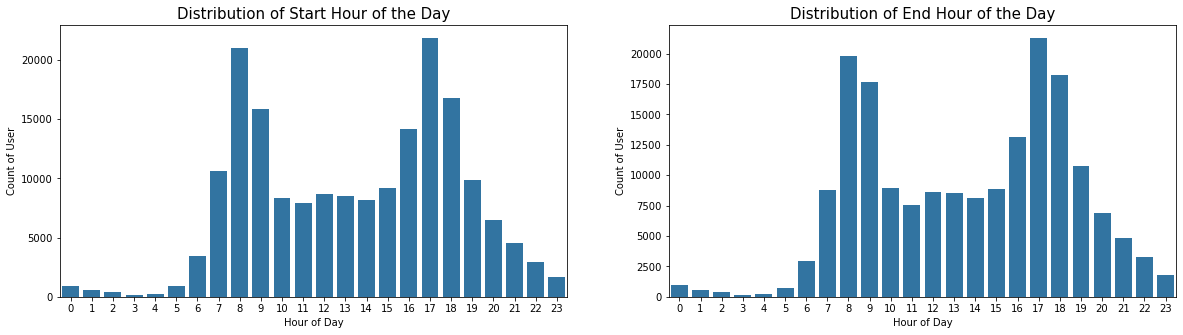

In [3]:
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
# plot start hour of the day
order = df['start_hour'].value_counts().index
sb.countplot(data = df, x = 'start_hour', color = sb.color_palette()[0]);

plt.title('Distribution of Start Hour of the Day', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Hour of Day");

# plot for end_hour 
plt.subplot(1,2,2)

sb.countplot(data = df, x = 'end_hour', color = sb.color_palette()[0])

plt.title('Distribution of End Hour of the Day', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Hour of Day");

## Insight
The chart above shows the distribution of the times the trips started and ended. Both charts have a bimodal distribution with 8am and 5pm as the most popular start and end times of the day. Notice that both times are during the rush hour where workplaces are just opening and closing respectively.


## Most Popular Start and End Stations
There's a slightly similar distribution between the start station and end station. I have zoomed into both distribution, the most popular stations for both start and end staions falls within 50 and 100 on the x-axis, so I have set the limit to be within those values

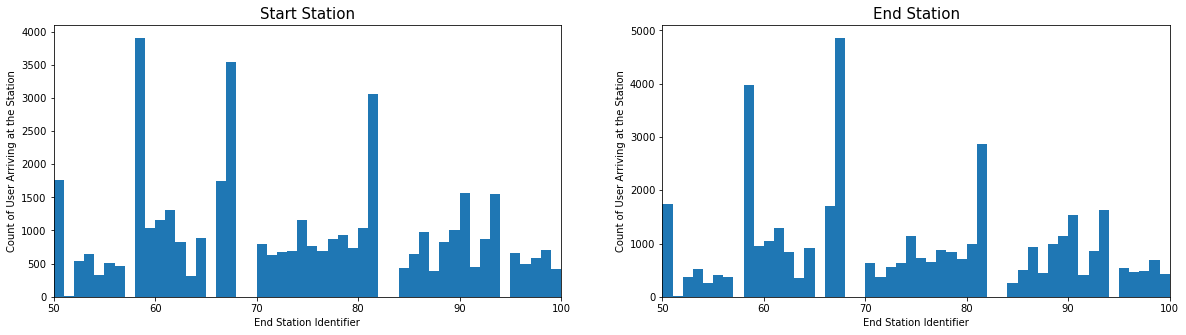

In [4]:
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)

bins = np.arange(0, df['start_station_id'].max()+1, 1)
plt.hist(data = df, x = 'start_station_id', bins = bins);
plt.xlim(50,100)
plt.title('Start Station', fontsize = 15)
plt.ylabel('Count of User Arriving at the Station')
plt.xlabel("End Station Identifier");

# plot for end_time 
plt.subplot(1,2,2)
bins = np.arange(0, df['end_station_id'].max()+1, 1)
plt.hist(data = df, x = 'end_station_id', bins = bins);
plt.xlim(50,100);
plt.title('End Station', fontsize = 15)
plt.ylabel('Count of User Arriving at the Station')
plt.xlabel("End Station Identifier");

## Insight
Start station with id of 58 is the most popular start station followed by start station with id of 67 while end station with id of 67 is the most popular end station followed by end station with id of 58.

## Distribution of Gender

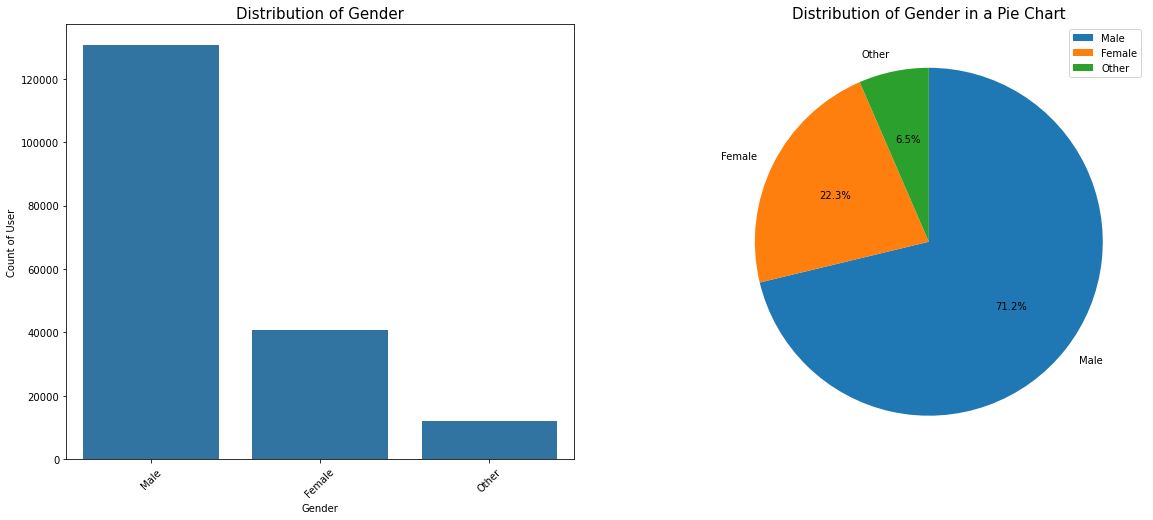

In [5]:
plt.figure(figsize = [20,8])

gender_count = df['member_gender'].value_counts()
total = gender_count.sum()
order = gender_count.index

# plot the bar chart of the distribution
plt.subplot(1,2,1)
sb.countplot(data = df, x = 'member_gender', color = sb.color_palette()[0], order = order);

plt.xticks(rotation = 45)
plt.title('Distribution of Gender', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Gender")


# plot the pie chart of the distribution
plt.subplot(1,2,2)
plt.pie(gender_count, labels = order, startangle = 90, autopct='%1.1f%%', counterclock = False);
plt.title('Distribution of Gender in a Pie Chart', fontsize = 15)
plt.legend();

## Insight
The gender is not a strong enough factor that determines the trip duration. But the men account for over 70 percent of the users.

## Relationship Between Trip Duration and User Age

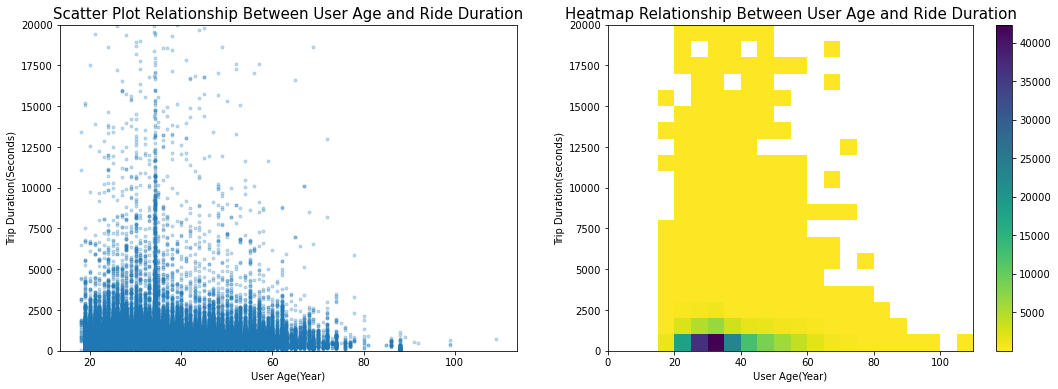

In [6]:
plt.figure(figsize = [18, 6])

age = 2019 - df['member_birth_year']

plt.subplot(1,2,1)

plt.scatter(data = df, x = age.fillna(age.mean()), y = 'duration_sec', marker = '.', alpha = 0.25)
# set the limit on y axis to zoom into the distribution
plt.ylim([0, 20000])
plt.xlabel('User Age(Year)')
plt.ylabel('Trip Duration(Seconds)')
plt.title('Scatter Plot Relationship Between User Age and Ride Duration', fontsize = 15);

plt.subplot(1,2,2)

bins_x = np.arange(0, age.max()+5, 5)
bins_y = np.arange(0, df['duration_sec'].max()+50, 1000)

plt.hist2d(data = df, x = age.fillna(age.mean()), y = 'duration_sec', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.ylim([0, 20000])
plt.xlabel('User Age(Year)')
plt.ylabel('Trip Duration(seconds)')
plt.title('Heatmap Relationship Between User Age and Ride Duration', fontsize = 15);

## Insight
The heatmap shows that most riders age fall within 20 years and 40 years with trip duration not more than 2500 seconds. 

## Most Popular Start and End station combination

In [7]:
comb = df.groupby(['start_station_name', 'end_station_name']).size().sort_values(ascending = False)[:10]
comb = comb.reset_index(name = 'count')
comb

,start_station_name,end_station_name,count
0,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...,337
1,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,314
2,Grand Ave at Perkins St,19th Street BART Station,310
3,The Embarcadero at Sansome St,Steuart St at Market St,285
4,19th Street BART Station,Grand Ave at Perkins St,284
5,Townsend St at 7th St,San Francisco Caltrain Station 2 (Townsend St...,272
6,Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),272
7,San Fernando St at 7th St,5th St at Virginia St,249
8,Market St at 10th St,Powell St BART Station (Market St at 4th St),247
9,5th St at Virginia St,San Fernando St at 7th St,242


## Insight
The most popular combination of start and end station are:

start station: Berry St at 4th St.

end station: San Francisco Ferry Building, with total count of 337 trips.


## Average Trip Duration by User Type

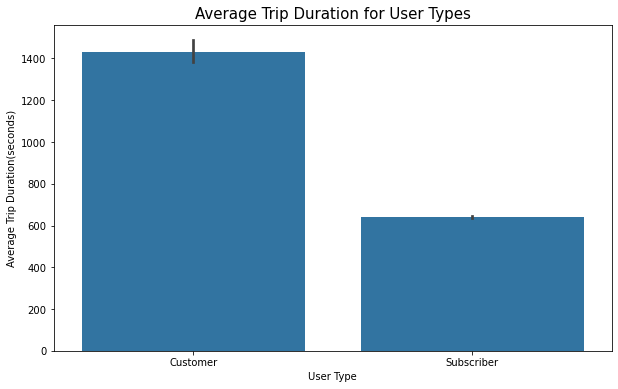

In [8]:
# avg duration vs user_type
plt.figure(figsize=(10,6))
avg = df['duration_sec']
sb.barplot(data=df, x='user_type', y=avg, color = sb.color_palette()[0]);
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration(seconds)')
plt.title('Average Trip Duration for User Types', fontsize = 15);

Customer have two times the average trip duration than Subscriber has. The histogram below shows the individual distribution of the two values.

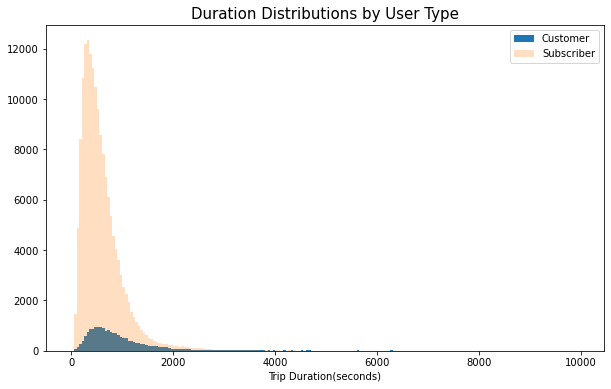

In [9]:
# create a dataframe that contains the records on only customers
cust = df.query("user_type == 'Customer'")
# create a dataframe that contains the records on only subscribers
sub = df.query("user_type == 'Subscriber'")

plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

# plor histogram of each dataframe
plt.hist(cust.duration_sec, bins = bins, label='Customer')
plt.hist(sub.duration_sec, bins = bins, alpha=0.25, label='Subscriber')

plt.legend()
plt.title('Duration Distributions by User Type', fontsize = 15)
plt.xlabel('Trip Duration(seconds)', fontsize = 10);

## Insight
The plot shows that the customer value spreads wide across the duration axis while the subscriber is narrowed to one point. The sum of the high trip duration values divided by the small count value will result in higher average trip duration.

## Average Trip Duration by Gender

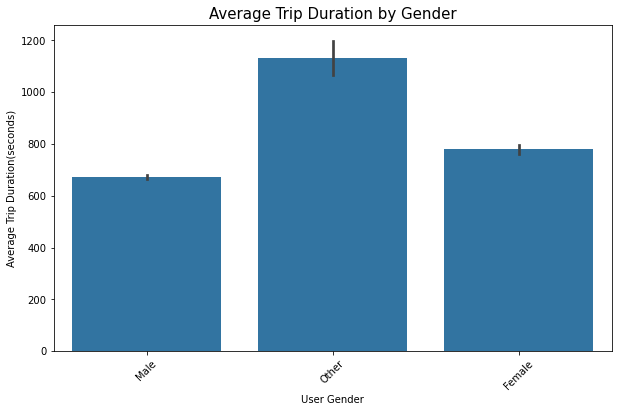

In [10]:
plt.figure(figsize=(10,6))
sb.barplot(data=df, x='member_gender', y='duration_sec', color = sb.color_palette()[0])
plt.xlabel('User Gender')
plt.ylabel('Average Trip Duration(seconds)')
plt.title('Average Trip Duration by Gender', fontsize = 15);
plt.xticks(rotation = 45);

'Other' is the gender that has the highest average trip duration. The reason was the same as why Customers have higher average trip duration than Subscriber. I'll visualize the reason 

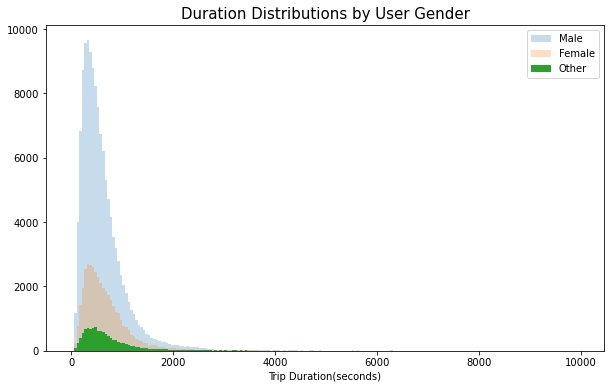

In [11]:
# create a dataframe that contains the records on only male users
man = df.query("member_gender == 'Male'")
# create a dataframe that contains the records on only female users
wmn = df.query("member_gender == 'Female'")
# create a dataframe that contains the records on other users
oth = df.query("member_gender == 'Other'")

plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

# plot histogram of each dataframe
plt.hist(man.duration_sec, bins = bins, alpha=0.25, label='Male')
plt.hist(wmn.duration_sec, bins = bins, alpha=0.25, label='Female')
plt.hist(oth.duration_sec, bins = bins, label='Other')


plt.legend()
plt.title('Duration Distributions by User Gender', fontsize = 15)
plt.xlabel('Trip Duration(seconds)', fontsize = 10);

## Insight
Like earlier, 'Other' is widely distributed across the trip duration axis, hence the reason for it's highest average value.

In [12]:
!jupyter nbconvert Ford_GoBike_Data_Analysis_Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_Data_Analysis_Part_II.ipynb to slides
[NbConvertApp] Writing 833902 bytes to Ford_GoBike_Data_Analysis_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Sofiyah\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Sofiyah\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Sofiyah\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Sofiyah\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Sofiyah\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(no